# 📘 Proyecto de Ciencia de Datos  
## Análisis de la Relación entre Actividades y Parciales  

---

### 👩‍🎓 Estudiante: *Julieth Shirley Cruz Posada*  
### 📚 Asignatura: Ciencia de Datos  
### 🏫 Institución: *Corporación Universitaria del Huila*  
### 📅 Fecha: 3 de octubre 2025  

---



## 📊 Foro: Análisis temporal aplicado a predicciones

En este caso práctico simulamos cómo una empresa eléctrica puede utilizar modelos **ARIMA** y **Prophet** para predecir la demanda energética semanal.  
El objetivo es identificar **tendencias, estacionalidades y patrones** que permitan planificar mejor la producción y evitar sobrecostos o cortes de suministro.  

Los datos son generados de forma sintética, pero imitan comportamientos reales de consumo energético.  
Al final, comparamos ambos modelos mediante métricas de error.



In [9]:
!pip install prophet --quiet
!pip install cmdstanpy --quiet
!pip install statsmodels --quiet
!pip install scikit-learn --quiet


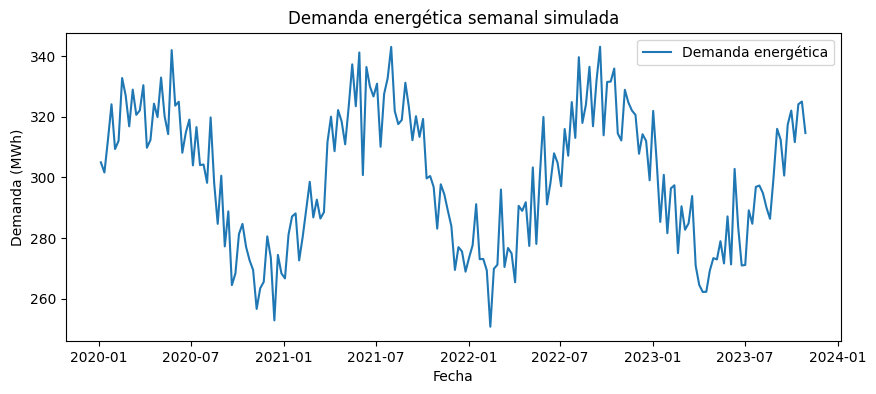

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [10]:
# ==========================================
# 🧠 Predicción de Demanda Energética con ARIMA y Prophet (versión estable)
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# 1️⃣ Simular datos históricos de demanda energética
np.random.seed(42)
fechas = pd.date_range(start="2020-01-01", periods=200, freq="W")
demanda = 300 + np.sin(np.arange(200)/10)*30 + np.random.normal(0, 10, 200)
data = pd.DataFrame({"ds": fechas, "y": demanda})

# 2️⃣ Visualizar los datos originales
plt.figure(figsize=(10,4))
plt.plot(data["ds"], data["y"], label="Demanda energética")
plt.title("Demanda energética semanal simulada")
plt.xlabel("Fecha")
plt.ylabel("Demanda (MWh)")
plt.legend()
plt.show()

# 3️⃣ Dividir datos en entrenamiento y prueba
train = data.iloc[:-20]
test = data.iloc[-20:]

# 4️⃣ Modelo ARIMA
modelo_arima = ARIMA(train["y"], order=(2,1,2))
ajuste_arima = modelo_arima.fit()
pred_arima = ajuste_arima.forecast(steps=20)

# 5️⃣ Modelo Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(train)
futuro = modelo_prophet.make_future_dataframe(periods=20, freq="W")
pred_prophet = modelo_prophet.predict(futuro)

# 6️⃣ Graficar comparación
plt.figure(figsize=(10,5))
plt.plot(data["ds"], data["y"], label="Datos reales")
plt.plot(data["ds"].iloc[-20:], pred_arima, label="Predicción ARIMA", linestyle="--")
plt.plot(pred_prophet["ds"].iloc[-40:], pred_prophet["yhat"].iloc[-40:], label="Predicción Prophet", linestyle=":")
plt.title("Comparación de modelos ARIMA vs Prophet")
plt.xlabel("Fecha")
plt.ylabel("Demanda energética")
plt.legend()
plt.show()

# 7️⃣ Evaluación de errores
mae_arima = mean_absolute_error(test["y"], pred_arima)
rmse_arima = sqrt(mean_squared_error(test["y"], pred_arima))

mae_prophet = mean_absolute_error(test["y"].values, pred_prophet["yhat"].iloc[-20:])
rmse_prophet = sqrt(mean_squared_error(test["y"].values, pred_prophet["yhat"].iloc[-20:]))

print("📈 RESULTADOS DE PREDICCIÓN:")
print(f"Error medio absoluto (ARIMA): {mae_arima:.2f}")
print(f"Raíz del error cuadrático medio (ARIMA): {rmse_arima:.2f}")
print(f"Error medio absoluto (Prophet): {mae_prophet:.2f}")
print(f"Raíz del error cuadrático medio (Prophet): {rmse_prophet:.2f}")

# 8️⃣ Guardar resultados en Drive
from google.colab import drive
drive.mount("/content/drive")

ruta_guardado = "/content/drive/MyDrive/Ciencia-datos-2025-b-g1/FORO 1/"
data.to_csv(ruta_guardado + "demanda_energetica.csv", index=False)
pred_prophet.to_csv(ruta_guardado + "prediccion_prophet.csv", index=False)

print(f"\n✅ Archivos guardados correctamente en: {ruta_guardado}")

